## Importing some libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
import seaborn as sns
!pip install category_encoders

## Get the dataset

### Downloading dataset

In [2]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
!wget http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


### Getting column names

In [3]:
file=open('kddcup.names')
names=file.readlines()
file.close()

In [4]:
columns=[]
for i in range(1,len(names)):
  columns.append(names[i].split(':')[0])
columns.append('target')

In [5]:
columns

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

### Getting the training attack types

In [12]:
file=open('training_attack_types.txt')
training_attack_types=file.readlines()
file.close()

In [13]:
training_attack_types

['back dos\n',
 'buffer_overflow u2r\n',
 'ftp_write r2l\n',
 'guess_passwd r2l\n',
 'imap r2l\n',
 'ipsweep probe\n',
 'land dos\n',
 'loadmodule u2r\n',
 'multihop r2l\n',
 'neptune dos\n',
 'nmap probe\n',
 'perl u2r\n',
 'phf r2l\n',
 'pod dos\n',
 'portsweep probe\n',
 'rootkit u2r\n',
 'satan probe\n',
 'smurf dos\n',
 'spy r2l\n',
 'teardrop dos\n',
 'warezclient r2l\n',
 'warezmaster r2l\n',
 '\n']

In [14]:
attacks={}
for x in training_attack_types:
  tokens=x.strip().split(' ')
  if len(tokens)>1:
     attacks[tokens[0]]=tokens[1]


In [15]:
attacks['normal']='normal'

In [16]:
attacks

{'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'normal': 'normal'}

### Reading 10% of the data


In [10]:
df=pd.read_csv('kddcup.data_10_percent.gz',names=columns)

In [11]:
df['target'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

### Merging the attack types

In [12]:
df['target']=df['target'].apply(lambda x:attacks[x[:-1]])

## Data Exploration

In [13]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal


### Getting the categorical columns

In [14]:
cat_columns=df.select_dtypes(include=['object']).columns.tolist()

In [15]:
cat_columns

['protocol_type', 'service', 'flag', 'target']

### Checking for null values

In [16]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

No Null values in the dataframe

### Performing EDA

<AxesSubplot:>

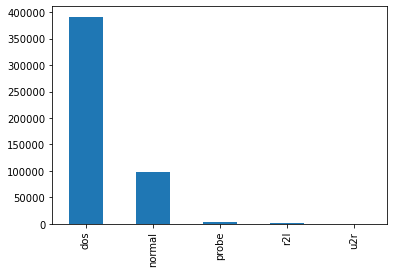

In [17]:
df['target'].value_counts().plot(kind='bar')

We see that the dos is highest in the data followed by normal while probe,r21 and u2r has very low requests

<AxesSubplot:>

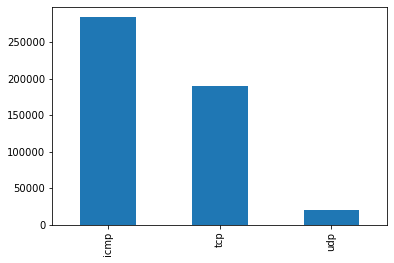

In [18]:
df['protocol_type'].value_counts().plot(kind='bar')

ICMP has the highest presence in the data followed by tcp and udp

<AxesSubplot:>

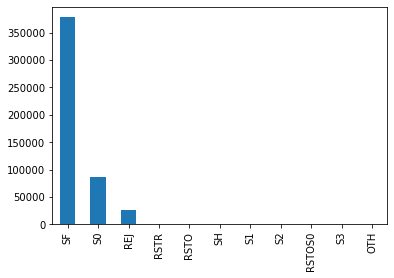

In [19]:
df['flag'].value_counts().plot(kind='bar')

<AxesSubplot:>

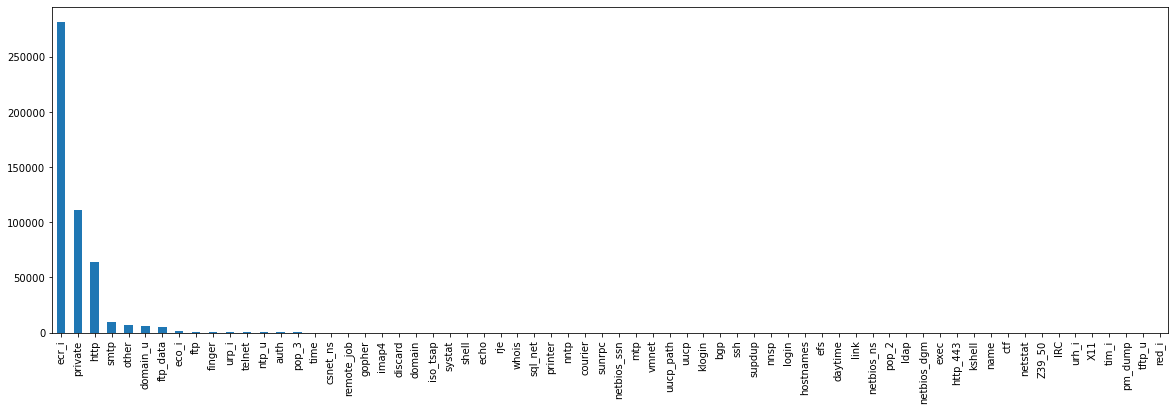

In [20]:
plt.figure(figsize=(20,6))
df['service'].value_counts().plot(kind='bar')

## Preprocessing the data

### Finding the highly correlated columns and removing them

<AxesSubplot:>

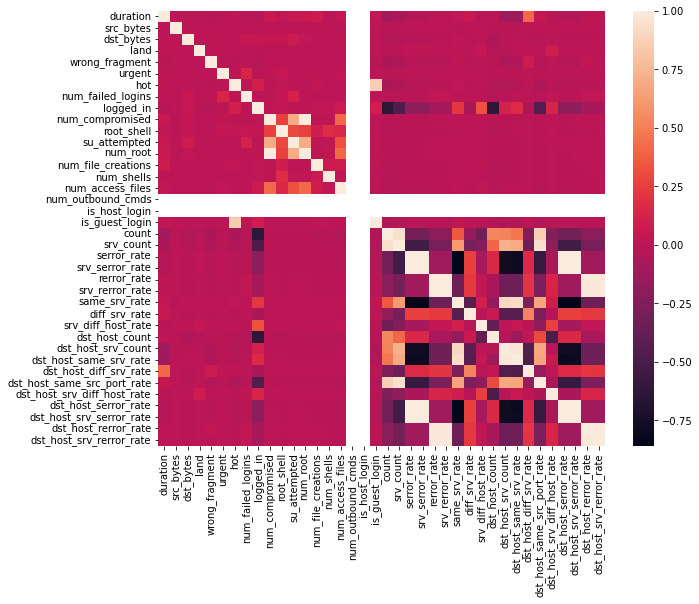

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

Removing the useless num_outbound_cmds column because its a zero array

### Removing Highly Correlated Features

In [23]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

C:\Users\rafay\AppData\Local\Temp/ipykernel_1856/2731660182.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Both are 0 arrays with 0 correlation to data

In [107]:
to_drop.append('is_host_login')
to_drop.append('num_outbound_cmds')

In [108]:
to_drop

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'is_host_login',
 'num_outbound_cmds']

In [25]:
df.drop(to_drop,axis=1,inplace=True)

In [26]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.00,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.00,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.00,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.00,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.00,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.0,59,59,0.0,0.02,0.00,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,...,0.0,1.0,0.0,1.0,1,69,0.0,1.00,0.04,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,...,0.0,1.0,0.0,0.0,11,79,0.0,0.09,0.04,normal
8,0,tcp,http,SF,210,151,0,0,0,0,...,0.0,1.0,0.0,0.0,8,89,0.0,0.12,0.04,normal
9,0,tcp,http,SF,212,786,0,0,0,1,...,0.0,1.0,0.0,0.0,8,99,0.0,0.12,0.05,normal


## Performing Train test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x=df.drop('target',axis=1)
y=df['target']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

## Encoding Data


### Encoding categorical columns

In [29]:
cat_columns

['protocol_type', 'service', 'flag', 'target']

In [30]:

cat_columns=cat_columns[:-1]
cat_columns.remove('service')

In [31]:
ordinal=['service']

In [32]:
cat_columns

['protocol_type', 'flag']

In [33]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import make_column_transformer

In [34]:
ct=make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),cat_columns),
                           ( BinaryEncoder(),ordinal),
                           remainder='passthrough')

In [35]:
ct.fit(xtrain)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['protocol_type', 'flag']),
                                ('binaryencoder', BinaryEncoder(),
                                 ['service'])])

In [36]:
encoded_xtrain=ct.transform(xtrain)
encoded_xtest=ct.transform(xtest)

### Encoding Labels

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
label_encoder=LabelEncoder()

In [39]:
encoded_ytrain=label_encoder.fit_transform(ytrain)

In [40]:
encoded_ytest=label_encoder.transform(ytest)

**Comparing The shapes before and after encoding**

In [41]:
x.shape,encoded_xtrain.shape

((494021, 32), (330994, 50))

## Modelling

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
import timeit

In [43]:
rfc=RandomForestClassifier(n_estimators=50)

In [44]:
start_time = timeit.default_timer()
rfc.fit(encoded_xtrain,ytrain)
end_time = timeit.default_timer()

In [45]:
training_accuracy=rfc.score(encoded_xtrain,ytrain)
testing_accuracy=rfc.score(encoded_xtest,ytest)

In [46]:
total_time=end_time-start_time

In [47]:
metrics=[['Random Forest Classifier',total_time,training_accuracy,testing_accuracy]]

In [48]:
model_results=pd.DataFrame(metrics,columns=['Model Name','Execution time','Training Accuracy','Testing Accuracy'])

In [49]:
model_results

,Model Name,Execution time,Training Accuracy,Testing Accuracy
0,Random Forest Classifier,16.637194,0.999997,0.999785


### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtc=DecisionTreeClassifier()

In [52]:
start_time = timeit.default_timer()
dtc.fit(encoded_xtrain,ytrain)
end_time = timeit.default_timer()

In [53]:
training_accuracy=dtc.score(encoded_xtrain,ytrain)
testing_accuracy=dtc.score(encoded_xtest,ytest)
total_time=end_time-start_time

In [54]:
metrics=['Decision Tree Classifier',total_time,training_accuracy,testing_accuracy]

In [55]:
model_results.loc[len(model_results.index)]=metrics

### Multinomial Naive bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
mnb=MultinomialNB()

In [58]:
start_time = timeit.default_timer()
mnb.fit(encoded_xtrain,ytrain)
end_time = timeit.default_timer()

In [59]:
training_accuracy=mnb.score(encoded_xtrain,ytrain)
testing_accuracy=mnb.score(encoded_xtest,ytest)
total_time=end_time-start_time

In [60]:
metrics=['Multinomial Naive bayes',total_time,training_accuracy,testing_accuracy]

In [61]:
model_results.loc[len(model_results.index)]=metrics

### Neural Networks

In [62]:
import tensorflow as tf

In [63]:
neural_network=tf.keras.Sequential([
                tf.keras.layers.Dense(50,activation='relu'),
                tf.keras.layers.Dense(30,activation='relu'),
                tf.keras.layers.Dense(30,activation='relu'),
                tf.keras.layers.Dense(5,activation='softmax')
])

neural_network.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['Accuracy'])

In [64]:
start_time = timeit.default_timer()
neural_network.fit(encoded_xtrain,encoded_ytrain,epochs=10,batch_size=128,verbose=0)
end_time = timeit.default_timer()

In [65]:
training_accuracy=round(neural_network.evaluate(encoded_xtrain,encoded_ytrain)[1],5)
testing_accuracy=round(neural_network.evaluate(encoded_xtest,encoded_ytest)[1],5)
total_time=end_time-start_time

5095/5095 [==============================] - 24s 5ms/step - loss: 149.8511 - Accuracy: 0.9956


In [66]:
metrics=['Neural network',total_time,training_accuracy,testing_accuracy]

In [67]:
model_results.loc[len(model_results.index)]=metrics

### XGBoost Classifier

In [68]:
from xgboost import XGBClassifier

In [69]:
xgb=XGBClassifier()

In [70]:
start_time = timeit.default_timer()
xgb.fit(encoded_xtrain,encoded_ytrain)
end_time = timeit.default_timer()

In [75]:
training_accuracy=xgb.score(encoded_xtrain,ytrain)
testing_accuracy=xgb.score(encoded_xtest,ytest)
total_time=end_time-start_time

In [76]:
metrics=['XGBoost Classifer',total_time,training_accuracy,testing_accuracy]

In [73]:
model_results.loc[len(model_results.index)]=metrics

In [81]:
model_results

,Model Name,Execution time,Training Accuracy,Testing Accuracy
0,Random Forest Classifier,16.637194,0.999997,0.999785
1,Decision Tree Classifier,3.242903,0.999997,0.999650
2,Multinomial Naive bayes,1.060684,0.894648,0.894619
3,Neural network,118.014205,0.995480,0.995580
4,XGBoost Classifer,66.358792,0.000000,0.000000


**Decision tree algorithm is the best performing algorithm here since it is performing bettter with significant time**

## Using all of the dataset on best model

### Imports

In [4]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import itertools
import matplotlib.pyplot as plt

### Reading Dataset and Declaring already processed columns

In [138]:
columns=['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']
to_drop=['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'is_host_login',
 'num_outbound_cmds']
attacks={'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'normal': 'normal'}

In [139]:
df=pd.read_csv('kddcup.data.gz',names=columns)
df['target']=df['target'].apply(lambda x:attacks[x[:-1]])

### Preprocessing dataset

**Removing highly correlated columns**

In [140]:
df.dropna(inplace=True)
df.drop(to_drop,axis=1,inplace=True)

**Finding categorical columns**

In [141]:
cat_columns=df.select_dtypes(include=['object']).columns.tolist()
cat_columns=cat_columns[:-1]
cat_columns.remove('service')
ordinal=['service']

**Creating x,y and performing train test split**

In [142]:
x=df.drop('target',axis=1)
y=df['target']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

**Encoding columns**

In [143]:
ct=make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),cat_columns),
                           ( BinaryEncoder(),ordinal),
                           remainder='passthrough')
ct.fit(xtrain)
encoded_xtrain=ct.transform(xtrain)
encoded_xtest=ct.transform(xtest)

In [144]:
dtc=DecisionTreeClassifier()

In [145]:
dtc.fit(encoded_xtrain,ytrain)

DecisionTreeClassifier()

## Evaluate the best model

In [146]:
dtc.score(encoded_xtest,ytest)

0.9999276206430875

In [147]:
pred=dtc.predict(encoded_xtest)

In [148]:
print(confusion_matrix(ytest,pred))
print('\n')
print(classification_report(ytest,pred))

[[1281466      13       4       0       0]
 [      8  320978      11      18       6]
 [      1      26   13565       1       1]
 [      0      14       2     346       3]
 [      0       8       1       0      11]]


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00   1281483
      normal       1.00      1.00      1.00    321021
       probe       1.00      1.00      1.00     13594
         r2l       0.95      0.95      0.95       365
         u2r       0.52      0.55      0.54        20

    accuracy                           1.00   1616483
   macro avg       0.89      0.90      0.90   1616483
weighted avg       1.00      1.00      1.00   1616483



## Saving model and encoders

In [1]:
import joblib


In [150]:
joblib.dump(ct, 'make_transformer.save') 

['make_transformer.save']

In [151]:
joblib.dump(dtc, 'model.save') 

['model.save']

In [90]:
joblib.dump(attacks, 'attacks.save') 

NameError: name 'attacks' is not defined

In [153]:
joblib.dump(to_drop, 'to_drop.save') 

['to_drop.save']

In [154]:
joblib.dump(columns, 'columns.save') 

['columns.save']

## Creating Pipeline for custom data

In [54]:
def predict_attacks(data):

    data=data.to_frame().swapaxes('index','columns')
    model=joblib.load('model.save') 
    ct=joblib.load('make_transformer.save') 
    to_drop=joblib.load('to_drop.save') 
    data.dropna(inplace=True)
    data.drop(to_drop,axis=1,inplace=True)
    xtest=ct.transform(data)
    return model.predict(xtest)

## Testing Pipeline

In [55]:
columns=joblib.load('columns.save')
df=pd.read_csv('kddcup.data_10_percent.gz',names=columns)

In [96]:
import random
attacks=joblib.load('attacks.save')
df['target']=df['target'].apply(lambda x:attacks[x[:-1]])

In [124]:
randint=random.randint(0,494020)
randint2=random.randint(0,494020)
randint3=random.randint(0,494020)
randint4=random.randint(0,494020)

print(predict_attacks(df.iloc[randint][:-1]),df['target'].iloc[randint])
print(predict_attacks(df.iloc[randint2][:-1]),df['target'].iloc[randint2])
print(predict_attacks(df.iloc[randint3][:-1]),df['target'].iloc[randint3])
print(predict_attacks(df.iloc[randint4][:-1]),df['target'].iloc[randint4])

['dos'] dos
['dos'] dos
['dos'] dos
['dos'] dos


In [87]:
df.shape

(494021, 42)